<a href="https://colab.research.google.com/github/RaqFern/Treinamento-de-modelos-de-classifica-o/blob/main/RaquelFernandesdaSilva_T2_Trabalho_Final_Metodos_Quant_II_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução ao PyCaret**

**[*PyCaret*](https://pycaret.org)** é uma biblioteca de aprendizado de máquina (AM) em Python, *open source* e de baixa codificação (*low-code approach*) que automatiza fluxos de trabalho de aprendizado de máquina. É uma ferramenta que automatiza e gerencia modelos de AM, o que promove mais agilidade no ciclo de desenvolvimento para soluções de *Data Science* e *Analytics*.

## **Instalação do PyCaret e suas dependências**

Para verificar formas de instalação do ***PyCaret 2.3.10*** em outros ambientes, além do Google Colab, veja a documentação oficial de [instalação](https://pycaret.gitbook.io/docs/get-started/installation), [ambiente](https://pycaret.gitbook.io/docs/get-started/installation#enviroment) e [dependências](https://pycaret.gitbook.io/docs/get-started/installation#dependencies).


Caso apareça a mensagem de **WARNING** em vermelho, após a instalação, pode ignorá-la: 
***The following packages were previously imported in this runtime: [matplotlib,mpl_toolkits,numpy]. You must restart the runtime in order to use newly installed versions.*** Se preferir que a mensagem não apareça mais, basta executar novamente o trecho de instalação (<code>!pip install -U ...</code>)

In [ ]:
!pip install -U pycaret shap pandas numpy scikit-learn autoviz ipywidgets

     |████████████████████████████████| 320 kB 5.5 MB/s 
     |████████████████████████████████| 564 kB 35.0 MB/s 
     |████████████████████████████████| 59 kB 6.4 MB/s 
     |████████████████████████████████| 6.8 MB 38.8 MB/s 
     |████████████████████████████████| 1.3 MB 40.7 MB/s 
     |████████████████████████████████| 1.7 MB 20.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 118 kB 58.2 MB/s 
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 2.0 MB 41.4 MB/s 
     |████████████████████████████████| 167 kB 47.6 MB/s 
     |████████████████████████████████| 16.8 MB 35.9 MB/s 
     |████████████████████████████████| 261 kB 52.3 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 690 kB 41.2 MB/s 
     |███████████████████

In [ ]:
from pycaret.classification import *
from sklearn import *

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


# **Carregando o arquivo de dados escolhido, neste caso o dataset "Iris"**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


# **Conjunto de dados**
Carregando os dados a serem analisados. **Lembre-se:** é necessário carregar o arquivo de dados no ambiente Google Colab, antes de executar o trecho seguinte.

In [ ]:
# Carregue os dados usando pandas
# df
df = pd.read_csv('iris.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Verificando se o dataset escolhido é balanceado, pois para casos de classificacao quanto mais balanceado melhor. Neste caso, observa-se que para cada especie há a mesma quantidade de dados. 

In [ ]:
df['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

ImportError: ignored

<Figure size 720x576 with 1 Axes>

# **Dividindo o dataset em 2**
A primeira parte irá conter 95% dos dados que será usada para treinar o modelo e a segunda parte para testar com o modelo escolhido.


In [ ]:
data_treino = df.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_teste = df.drop(data_treino.index).reset_index(drop=True)

In [ ]:
print('Data para treino: ' + str(data_treino.shape))
print('Data para teste ' + str(data_teste.shape))

Data para treino: (142, 5)
Data para teste (8, 5)


In [ ]:
data_treino['species'].value_counts()

Iris-setosa        48
Iris-versicolor    47
Iris-virginica     47
Name: species, dtype: int64

# **Criando *Setup* baseado no PyCaret**

Essa função inicializa o procedimento AM no PyCaret e prepara o *pipeline* de transformação com base em todos os parâmetros utilizados na função. A função **setup** deve ser chamada antes de executar qualquer outra função e requer apenas dois parâmetros: **dados** e **variável-alvo** (*target*). 

**OBS**.: Todos os demais parâmetros são opcionais.

In [ ]:
s = setup(data = data_treino, target = 'species', session_id=77)

,Description,Value
0,session_id,77
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virgi..."
4,Original Data,"(142, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# **Treinamento de modelos de classificação**
A função ***compare_models*** faz uma comparação dos conjunto de modelos disponíveis no seu repositório para apresentar uma listagem de resultado (métricas). Essa função treina e avalia o desempenho de todos os estimadores disponíveis na biblioteca de modelos usando validação cruzada. A saída dessa função é uma grade de pontuação com pontuações médias validadas cruzadas. As métricas avaliadas durante o CV podem ser acessadas usando a função get_metrics. Métricas customizadas também podem ser adicionadas (ou removidas) usando as funções *add_metric* e *remove_metric*. Para melhor entendimento dessa funcionalidade, acesse https://pycaret.gitbook.io/docs/get-started/functions/train#compare_models

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9700,0.9969,0.9694,0.9725,0.9697,0.9545,0.9559,0.019
lda,Linear Discriminant Analysis,0.9600,0.9969,0.9583,0.9690,0.9588,0.9392,0.9445,0.017
knn,K Neighbors Classifier,0.9589,0.9865,0.9611,0.9692,0.9583,0.9383,0.9438,0.115
lr,Logistic Regression,0.9489,0.9971,0.9500,0.9642,0.9470,0.9234,0.9321,0.514
nb,Naive Bayes,0.9389,0.9870,0.9417,0.9487,0.9381,0.9078,0.9133,0.016
gbc,Gradient Boosting Classifier,0.9389,0.9798,0.9389,0.9487,0.9378,0.9076,0.9131,0.223
et,Extra Trees Classifier,0.9389,0.9955,0.9389,0.9487,0.9378,0.9076,0.9131,0.465
dt,Decision Tree Classifier,0.9289,0.9464,0.9306,0.9442,0.9270,0.8931,0.9018,0.016
ada,Ada Boost Classifier,0.9289,0.9849,0.9306,0.9487,0.9266,0.8931,0.9044,0.103
lightgbm,Light Gradient Boosting Machine,0.9289,0.9723,0.9306,0.9442,0.9270,0.8931,0.9018,0.109


In [ ]:
print(best)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)


O modelo que apresentou melhores resultados nesse dataset foi o Quadratic Discriminant Analysis('qda'), e portanto, o escolhido

# **Criação do Modelo** *(desejado ou escolhido)*
A função ***create_model*** treina e avalia o desempenho de um determinado modelo usando validação cruzada. A saída desta função é uma grade de pontuação com pontuações de validação cruzada juntamente com média e desvio padrão dos indicadores de predição.

In [ ]:
qda_model = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.900,1.0000,0.8889,0.9250,0.8971,0.8485,0.8616
1,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.800,0.9690,0.8056,0.8000,0.8000,0.6970,0.6970
4,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


# **Avaliação do Modelo Selecionado (_best_)**
Função ***evaluate_model*** é utilizada para apresentar os métodos de avaliação do modelo. Essa função exibe uma interface de usuário para analisar o desempenho de um modelo treinado disponível por tipo de plot, conforme selecionado.

In [ ]:
evaluate_model(qda_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Função ***plot_model*** para gerar visualizações de modelo, conforme o parâmetro *plot="PlotType"*. Para outras visualizações, especifique o plot com as opções disponíveis na documentação oficial em https://pycaret.gitbook.io/docs/get-started/functions/analyze#plot_model



In [ ]:
pip install matplotlib==3.1.3

     |████████████████████████████████| 13.1 MB 67.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires matplotlib>=3.2.0, but you have matplotlib 3.1.3 which is incompatible.
autoviz 0.1.38 requires matplotlib>=3.3.3, but you have matplotlib 3.1.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


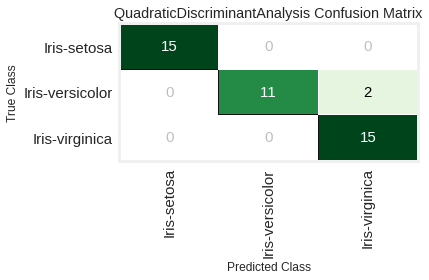

In [ ]:
plot_model(qda_model, plot = 'confusion_matrix')

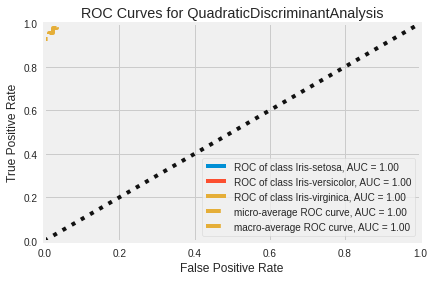

In [ ]:
plot_model(qda_model, plot='auc')

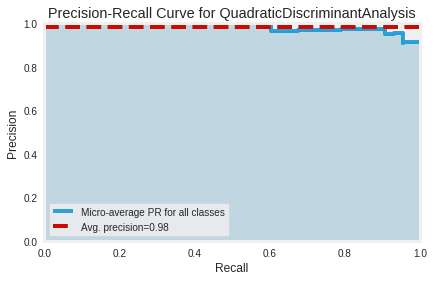

In [ ]:
plot_model(qda_model, plot='pr')

**Não consegui plotar o gráfico abaixo. **

In [ ]:
plot_model(qda_model, plot='feature')

TypeError: ignored

# **Predição do Modelo (*Deployment*)**

Etapa correspondente as funções de implantação no PyCaret (*MLOps*). Esta função gera o rótulo com base no modelo treinado.

In [ ]:
predict_model(qda_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9535,1.0,0.9487,0.959,0.953,0.9299,0.9329


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,4.4,3.0,1.3,0.2,Iris-setosa,Iris-setosa,1.0000
1,5.1,3.4,1.5,0.2,Iris-setosa,Iris-setosa,1.0000
2,6.9,3.1,5.4,2.1,Iris-virginica,Iris-virginica,1.0000
3,5.2,4.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
4,5.6,3.0,4.1,1.3,Iris-versicolor,Iris-versicolor,0.9989
5,6.8,3.2,5.9,2.3,Iris-virginica,Iris-virginica,1.0000
6,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
7,6.2,2.8,4.8,1.8,Iris-virginica,Iris-virginica,0.9938
8,5.4,3.4,1.5,0.4,Iris-setosa,Iris-setosa,1.0000
9,6.0,2.9,4.5,1.5,Iris-versicolor,Iris-versicolor,0.9854


### **Predição do Modelo** com probabilidade de cada classe

Essa parametrização usando ***raw_score*** é aplicável **apenas para abordagens de Classificação**.

In [ ]:
predict_model(qda_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.9535,1.0,0.9487,0.959,0.953,0.9299,0.9329


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,4.4,3.0,1.3,0.2,Iris-setosa,Iris-setosa,1.0000
1,5.1,3.4,1.5,0.2,Iris-setosa,Iris-setosa,1.0000
2,6.9,3.1,5.4,2.1,Iris-virginica,Iris-virginica,1.0000
3,5.2,4.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
4,5.6,3.0,4.1,1.3,Iris-versicolor,Iris-versicolor,0.9989
5,6.8,3.2,5.9,2.3,Iris-virginica,Iris-virginica,1.0000
6,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,1.0000
7,6.2,2.8,4.8,1.8,Iris-virginica,Iris-virginica,0.9938
8,5.4,3.4,1.5,0.4,Iris-setosa,Iris-setosa,1.0000
9,6.0,2.9,4.5,1.5,Iris-versicolor,Iris-versicolor,0.9854


### **Verificando a base para teste**
Agora, verificando o desempenho do modelo comparando-o com o dataset separado no início. O resultado de "testando_modelo" é o dataset com duas colunas adicionais a direita: "label" é a classe prevista; e "score" é a porcentagem de acerto da máquina. 


In [ ]:
testando_modelo = predict_model(qda_model, data_teste)

testando_modelo

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0,0,0,0,0,0,0


,sepal_length,sepal_width,petal_length,petal_width,species,Label,Score
0,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica,1.0000
1,6.8,3.2,5.9,2.3,Iris-virginica,Iris-virginica,1.0000
2,6.7,3.3,5.7,2.5,Iris-virginica,Iris-virginica,1.0000
3,6.7,3.0,5.2,2.3,Iris-virginica,Iris-virginica,1.0000
4,6.3,2.5,5.0,1.9,Iris-virginica,Iris-virginica,1.0000
5,6.5,3.0,5.2,2.0,Iris-virginica,Iris-virginica,1.0000
6,6.2,3.4,5.4,2.3,Iris-virginica,Iris-virginica,1.0000
7,5.9,3.0,5.1,1.8,Iris-virginica,Iris-virginica,0.9743


## Conclusão 

Neste projeto foi trabalhado a construção de um modelo usando a biblioteca PyCaret para prever a classificação da espécie de flores íris. O uso de uma ferramenta low-code e tão completa como o PyCaret foi possivel desenvolver um modelo com uma taxa de acertividade bem alta, conforme visto acima, de maneira mais rápida e com bons resultados. 

A escolha do dataset Iris facilitou o processo, pretendo dar seguimento aos estudos me baseando nos trechos de código feitos durante esse trabalho e aumentando gradualmente a dificuldade escolhendo datasets mais complexos e que exijam tratamento mais detalhado. 

In [ ]:
# Fim do trabalho


---

# **Avaliação**: Feedback sobre o Trabalho

---



Raquel,


Obrigado pelo trabalho desenvolvido.  

Agora diante dos resultados apresentados, gostaria de destacar a sua ótima estratégia de particionamento para manter uma amostra isolada para etapa de testes. Muito bom!

---

# Aguardo sua resposta aos questionamentos acima, caso queira melhorar sua avaliação

---


Atte.,
Gustavo Alexandre.

In [ ]:
# Fim da avaliação